Epoch 1/100
989/989 - 10s - loss: 0.0157 - 10s/epoch - 10ms/step
Epoch 2/100
989/989 - 5s - loss: 0.0034 - 5s/epoch - 5ms/step
Epoch 3/100
989/989 - 5s - loss: 0.0034 - 5s/epoch - 5ms/step
Epoch 4/100
989/989 - 5s - loss: 0.0033 - 5s/epoch - 5ms/step
Epoch 5/100
989/989 - 5s - loss: 0.0033 - 5s/epoch - 5ms/step
Epoch 6/100
989/989 - 5s - loss: 0.0032 - 5s/epoch - 5ms/step
Epoch 7/100
989/989 - 5s - loss: 0.0030 - 5s/epoch - 5ms/step
Epoch 8/100
989/989 - 5s - loss: 0.0030 - 5s/epoch - 5ms/step
Epoch 9/100
989/989 - 5s - loss: 0.0031 - 5s/epoch - 5ms/step
Epoch 10/100
989/989 - 5s - loss: 0.0031 - 5s/epoch - 5ms/step
Epoch 11/100
989/989 - 5s - loss: 0.0030 - 5s/epoch - 5ms/step
Epoch 12/100
989/989 - 5s - loss: 0.0030 - 5s/epoch - 5ms/step
Epoch 13/100
989/989 - 5s - loss: 0.0030 - 5s/epoch - 5ms/step
Epoch 14/100
989/989 - 5s - loss: 0.0029 - 5s/epoch - 5ms/step
Epoch 15/100
989/989 - 5s - loss: 0.0029 - 5s/epoch - 5ms/step
Epoch 16/100
989/989 - 5s - loss: 0.0028 - 5s/epoch - 6ms/ste

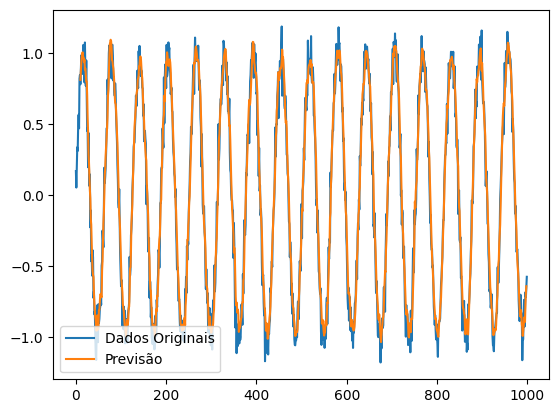

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler

# Gerando dados de exemplo
np.random.seed(7)
data = np.sin(np.linspace(0, 100, 1000)) + np.random.normal(0, 0.1, 1000)
data = data.reshape(-1, 1)

# Normalizando os dados
scaler = MinMaxScaler(feature_range=(0, 1))
data = scaler.fit_transform(data)

# Função para criar dataset com look_back
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset) - look_back - 1):
        a = dataset[i:(i + look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 10
X, Y = create_dataset(data, look_back)

# Reshape para [samples, time steps, features]
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# Criando o modelo LSTM
model = Sequential()
model.add(LSTM(50, input_shape=(look_back, 1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

# Treinando o modelo
model.fit(X, Y, epochs=100, batch_size=1, verbose=2)

# Fazendo previsões
train_predict = model.predict(X)

# Invertendo a normalização para comparar com os dados originais
train_predict = scaler.inverse_transform(train_predict)
Y_last = scaler.inverse_transform([Y])

# Plotando os resultados
plt.plot(scaler.inverse_transform(data), label='Dados Originais')
plt.plot(np.arange(look_back, look_back + len(train_predict)), train_predict, label='Previsão')
plt.legend()
plt.show()
